# Week 3: Linear Transformations

In [2]:
import numpy as np
import cv2 # Open CV library for image transformation

## 1 - Tranformation
Transformation is a function that maps one vector space to another (while respecting the underlying structure of the vector space).
For example, $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$:$$T\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}
          \tag{1}
          $$

In [3]:
def T(v):
    w = np.zeros((3, 1)) # 3 x 1 vector
    w[0, 0] = 3 * v[0, 0] # transform v to get w
    w[2, 0] = -2 * v[1, 0]
    return w

v = np.array([[3], [6], [8]])
T(v)

array([[  9.],
       [  0.],
       [-12.]])

## 2 - Linear Transformation
A transformation $T$ is said to be **linear** if the following two properties are true for any scalar $k$, and any input vectors $u$ and $v$:

1. $T(kv)=kT(v)$,
2. $T(u+v)=T(u)+T(v)$.

In [4]:
u = np.array([[-4], [5], [-2]])
k = 8
T(k*v) == k*T(v), T(u+v) == T(u) + T(v)

(array([[ True],
        [ True],
        [ True]]),
 array([[ True],
        [ True],
        [ True]]))

## 3 - Transformation as Matrix Multiplication
We can represent linear transformation in the form of a (transformation) matrix, so the transformation to v is done through multiplying matrix A with v.

In [5]:
def T(v):
    A = np.array([[4, 0], [0, 2], [0, -3]]) # 3x2 matrix
    w = A @ v
    return w
v = np.array([[3], [5]]) # 2x1 vector
T(v)

array([[ 12],
       [ 10],
       [-15]])

Matrix multiplication means transforming the vector space, and vice versa. You can transform multiple time by multiplying multiple matrices.

## 4 - Transformation in a Plane
To have a better intuition with the transformation, instead of using a random vector v, we can use <b>basis vectors</b> e. 

In [6]:
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

In [7]:
def transform_vectors(T, v1, v2):
    """
    Function to transform vectors v1, v2 by a specified transformation matrix T
    """
    V = np.hstack((v1, v2))
    return T(V)

We are going to visualize the transformation with both coordinates and images. 

In [8]:
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    """
    Function to visualize the linear transformation
    """
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7)) # set up plot
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))
    
    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0],[0, 0], [e1[0], e2[0]], [e1[1], e2[1]], color=color_original, angles='xy', scale_units='xy', scale=1) # plot original basis vectors
    plt.plot([0, e2[0], e1[0], e1[0]], 
             [0, e2[1], e2[1], e1[1]], 
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
    ax.text(e1[0]-0.2+e1_sgn[0], e1[1]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])
    ax.text(e2[0]-0.2+e2_sgn[0], e2[1]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)
    
    e1_transformed = T(e1)
    e2_transformed = T(e2)
    
    plt.quiver([0, 0],[0, 0], [e1_transformed[0], e2_transformed[0]], [e1_transformed[1], e2_transformed[1]], #plot basis vectors of the new vector space in the original coordinate
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,e2_transformed[0], e1_transformed[0]+e2_transformed[0], e1_transformed[0]], 
             [0,e2_transformed[1], e1_transformed[1]+e2_transformed[1], e1_transformed[1]], 
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed)])
    ax.text(e1_transformed[0][0]-0.2+e1_transformed_sgn[0], e1_transformed[1][0]-e1_transformed_sgn[1][0], 
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed)])
    ax.text(e2_transformed[0][0]-0.2+e2_transformed_sgn[0][0], e2_transformed[1][0]-e2_transformed_sgn[1][0], 
            f'$T(e_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.show()

((2, 329076), <matplotlib.collections.PathCollection at 0x7f7f70c90d00>)

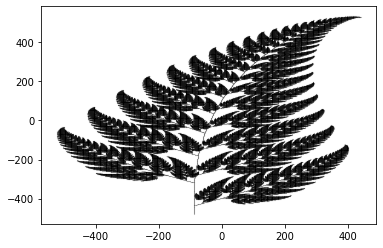

In [38]:
img = np.loadtxt('image.txt')
img.shape, plt.scatter(img[0], img[1], s=0.001, color='black') # Original image

### 4.1 Horizontal Scaling (Dilation)
Consider vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$. We only scale vector $e_1$.

In [23]:
def T_hscaling(v):
    A = np.array([[3, 0], [0, 1]]) # transformation vector matrix maps e1 to [2, 0] and keeps e1
    return A @ v

transform_vectors(T_hscaling, e1, e2)

array([[3, 0],
       [0, 1]])

/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (

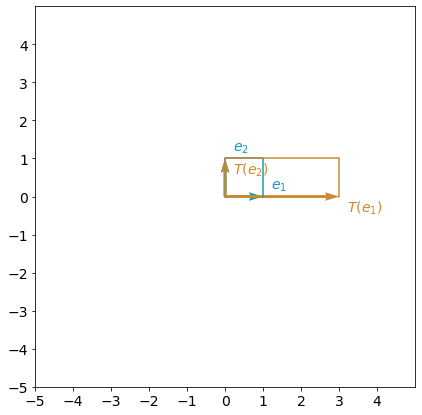

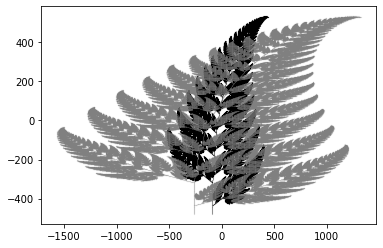

In [49]:
plot_transformation(T_hscaling, e1, e2)
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_hscaling(img)[0], T_hscaling(img)[1], s = 0.001, color = 'grey')

### 4.2 Reflection about y-axis (Vertical reflection)


In [25]:
def T_vertical_reflection(v):
    A = np.array([[-1, 0], [0, 1]]) # reflect x-coordinate of v1 to -v1 (1 to -1) and keep the vertical basis vector
    return A @ v

transform_vectors(T_vertical_reflection, e1, e2)

array([[-1,  0],
       [ 0,  1]])

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

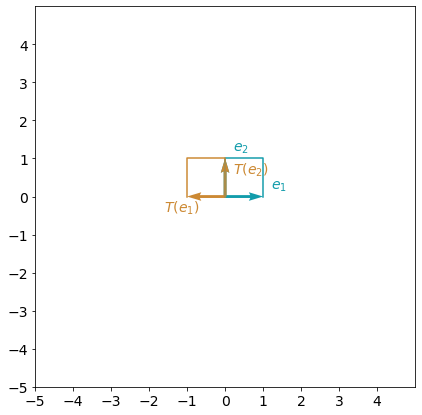

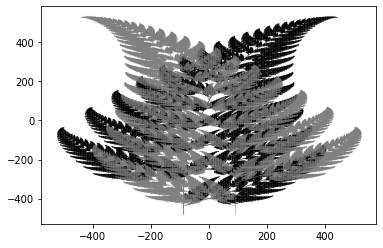

In [50]:
plot_transformation(T_vertical_reflection, e1, e2)
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_vertical_reflection(img)[0], T_vertical_reflection(img)[1], s = 0.001, color = 'grey')

### 4.3 Horizontal Shear
Horizontal shear maps $(x, y)$ to $(x + my, y)$.

In [72]:
def T_shear(m, v):
    A = np.array([[1, m], [0, 1]])
    return A @ v

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

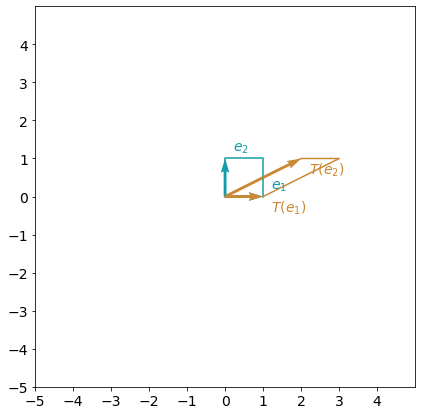

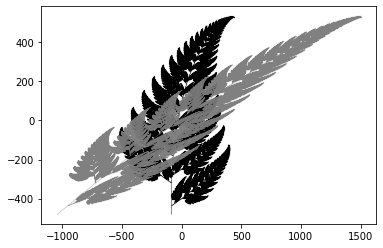

In [77]:
plot_transformation(lambda v: T_shear(2, v), e1, e2)
plt.scatter(img[0], img[1], s = 0.001, color = 'black')
plt.scatter(T_shear(2, img)[0], T_shear(3, img)[1], s = 0.001, color = 'grey')   

### 4.4 Rotation
As we rotate a vector by angle $\theta$ clockwise, $x$ will become $cos(\theta)x$, while $y$ becomes $sin(\theta)y$. Otherwise, when we rotate a vector by angle $\theta$ counterclockwise, $x$ will become $cos(\theta)x$, while $y$ becomes $sin(\theta + \pi / 2)y$ = -$sin(\theta)y$

In [78]:
def T_rotation(theta, v):
    A = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return A @ v

/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)])


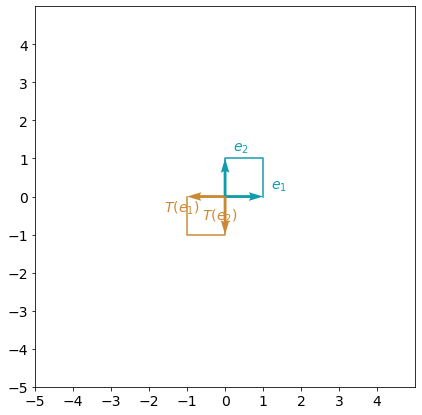

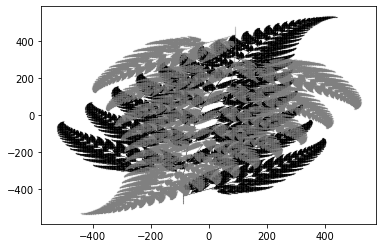

In [83]:
plot_transformation(lambda v: T_rotation(np.pi, v), e1, e2)
plt.scatter(img[0], img[1], s = 0.001, color = 'black')
plt.scatter(T_rotation(np.pi, img)[0], T_rotation(np.pi, img)[1], s = 0.001, color = 'grey')

### 4.5 Rotation & Stretch

In [86]:
def T_rotate_and_scale(theta, s, v):
    A_rotate = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    A_scale = np.array([[s, 0], [0, s]])
    return A_rotate @ A_scale @ v

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)])
/var/folders/s8/6rx9wz390_j4znp3wrdmf7pm0000gn/T/ipykernel_49557/2591807866.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

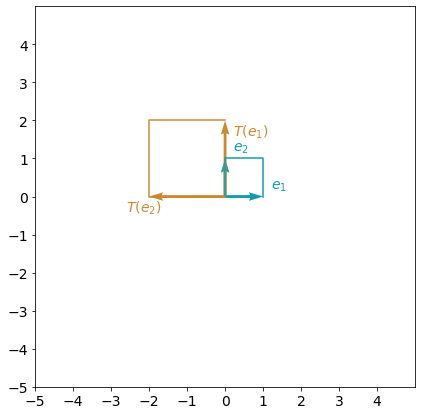

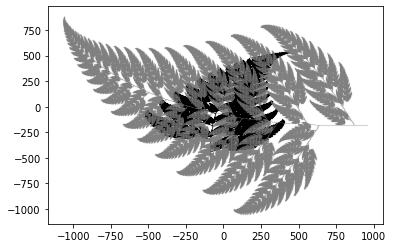

In [88]:
plot_transformation(lambda v: T_rotate_and_scale(np.pi/2, 2, v), e1, e2)    
plt.scatter(img[0], img[1], s = 0.001, color = 'black') 
plt.scatter(T_rotate_and_scale(np.pi/2, 2, img)[0], T_rotate_and_scale(np.pi/2, 2, img)[1], s = 0.001, color = 'grey')

## 5 - Application to Computer Graphics
As shapes are defined by vertexes (corners), linear transformation can be used to manipulate shapes, through scaling, reflection, shearing. etc.

Linear transformation helps with scale, because it just involves one-by-one calculation that can be ahndled by Graphics Processing Units (GPUs). Without this, we'll have to use software for rendering graphics through processing the coordinate of millions of vertexes.

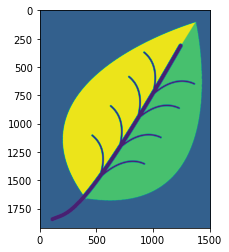

In [36]:
img = cv2.imread('leaf_original.png', 0)
plt.imshow(img)

### Rotate 90 degrees clockwise and apply a shear transformation

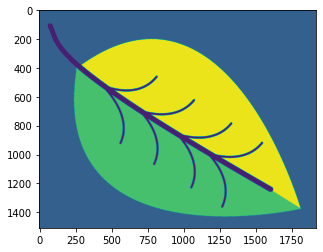

In [41]:
image_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # rotate 
plt.imshow(image_rotated)

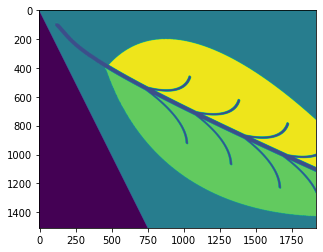

In [43]:
rows, cols = image_rotated.shape
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]]) # 3x3x3 matrix required for OpenCV library
image_rotated_sheared = cv2.warpPerspective(image_rotated, M, (int(cols), int(rows)))
plt.imshow(image_rotated_sheared)

If we apply transformation in different order, the result is different, as the matrix multiplication $BA\neq AB$.

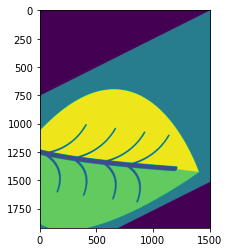

In [44]:
image_sheared = cv2.warpPerspective(img, M, (int(cols), int(rows)))
image_sheared_rotated = cv2.rotate(image_sheared, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image_sheared_rotated)

In [45]:
T_rotation_90_clockwise = np.array([[0, 1], [-1, 0]])
T_shear_x = np.array([[1, 0.5], [0, 1]])
T_rotation_90_clockwise @ T_shear_x == T_shear_x @ T_rotation_90_clockwise

array([[False,  True],
       [ True, False]])